# 函数原型

dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

参数|描述
---|---
src|原图像
ddepth|目标图像所需深度,当ddepth=-1时，表示输出图像与原图像有相同的深度
kernel|卷积核
anchor|内核的描点
detal|在将它们存储在dst中之前，将可选值添加到已过滤的像素中。类似于偏置。
borderType|像素外推法

该函数实际计算的是相关性，而不是卷积

$$\texttt{dst} (x,y) = \sum _{ \stackrel{0\leq x' < \texttt{kernel.cols},}{0\leq y' < \texttt{kernel.rows}} } \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )$$

# 导入库

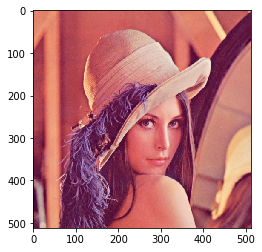

In [10]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt

def show_opencv_img(img):
    im2 = img[:,:,::-1] 
    plt.imshow(im2)

src = cv2.imread("lena.jpg")
show_opencv_img(src)

In [17]:
def my_filter2d(kernel):
    slove_dst = cv2.filter2D(src, -1, kernel)
    htich = np.hstack((src, slove_dst))
    show_opencv_img(htich)

# 几种卷积例子

## solve

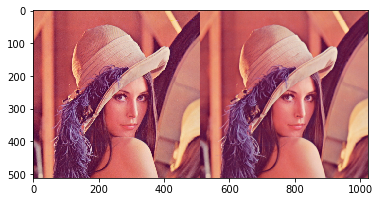

In [18]:
kernel = np.array((
        [0.0625, 0.125, 0.0625],
        [0.125, 0.25, 0.125],
        [0.0625, 0.125, 0.0625]), dtype="float32")

my_filter2d(kernel)

## 索贝尔

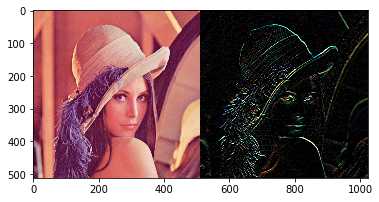

In [19]:
kernel = np.array((
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]), dtype="float32")
my_filter2d(kernel)

## 浮雕

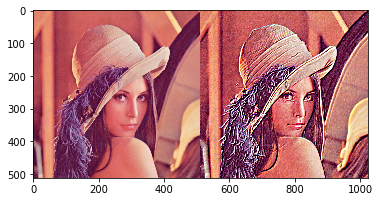

In [20]:
kernel = np.array((
        [-2,-1,0],
        [-1,1,1],
        [0,1,2]), dtype="float32")
my_filter2d(kernel)

## 锐化

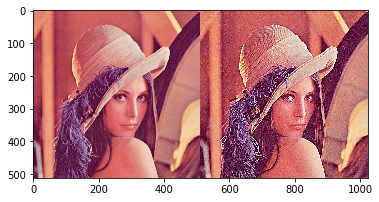

In [22]:
kernel = np.array((
        [0,-1,0],
        [-1,5,-1],
        [0,-1,0]), dtype="float32")
my_filter2d(kernel)

## 拉普拉斯算子

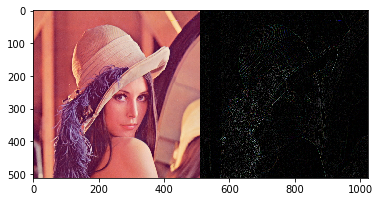

In [23]:
kernel = np.array((
        [0,1,0],
        [1,-4,1],
        [0,1,0]), dtype="float32")
my_filter2d(kernel)

## 分身identity

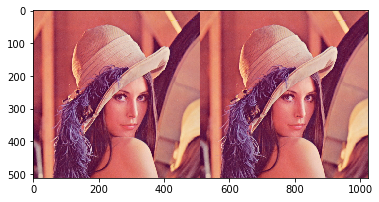

In [24]:
kernel = np.array((
        [0,0,0],
        [0,1,0],
        [0,0,0]), dtype="float32")
my_filter2d(kernel)

# 低通滤波和高通滤波区别

## 高通滤波器

以检验边缘的高通滤波器为例 


![](./图像/检测边缘卷积核.png)  

这是个三乘三的核 其元素总和为 0，边缘检测时 **所有元素总和为 0 是很重要的**，因为这类过滤器要计算的是相邻像素的差异 或者说变化，要计算差异 就需要将像素值相减，如果这些核值加起来不等于 0，那就意味着计算出来的差，权重会有正负结果就是滤波后的图像亮度会相应地提高或降低，这就是卷积核元素相加为零的原因。

## 低通滤波器

低通滤器通常会取均值 不像高通过滤器取的是差值，因此低通过滤器的元素加起来应该为 1，这就能保留图像的亮度，确保图像不会变亮或变暗，但我们可以看到 这个核的元素加起来等于 9，所以我们需要进行归一化处理 也就是将核值总和除以 9  
![](./图像/低通滤波器.png)

有时我们会想要个既能模糊图像 又能更好地保存图像边缘的过滤器，为此 我们可用高斯模糊，这或许是计算机视觉应用中最常用的低通过滤器了。高斯低通过滤器其实就是加权平均法 赋予中心像素最大的权重，但也会考虑到周围的像素 权重多少主要取决于周围像素有多接近中心像素
![](./图像/高斯滤波器.png)
